<a href="https://colab.research.google.com/github/MR-Toufigh/Basics-of-intelligent-systems-fall-2024/blob/main/The_second_mini_project_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import numpy as np
import itertools

In [2]:
#define muculloch pitts
class McCulloch_Pitts_neuron():

  def __init__(self , weights , threshold):
    self.weights = weights    #define weights
    self.threshold = threshold    #define threshold

  def model(self , x):
    #define model with threshold
    if self.weights @ x >= self.threshold:
        return 1
    else:
        return 0

In [10]:
#define model for dataset
def Area(x, y):
  neur1 = McCulloch_Pitts_neuron([-2, -1], -6)
  neur2 = McCulloch_Pitts_neuron([0, 1], 0)
  neur3 = McCulloch_Pitts_neuron([2, -1], 2)
  neur4 = McCulloch_Pitts_neuron([1, 1, 1], 3)

  z1 = neur1.model(np.array([x, y]))
  z2 = neur2.model(np.array([x, y]))
  z3 = neur3.model(np.array([x, y]))
  z4 = neur4.model(np.array([z1, z2, z3]))

  # 3 bit output
  # return str(z1) + str(z2)
  return list([z4])


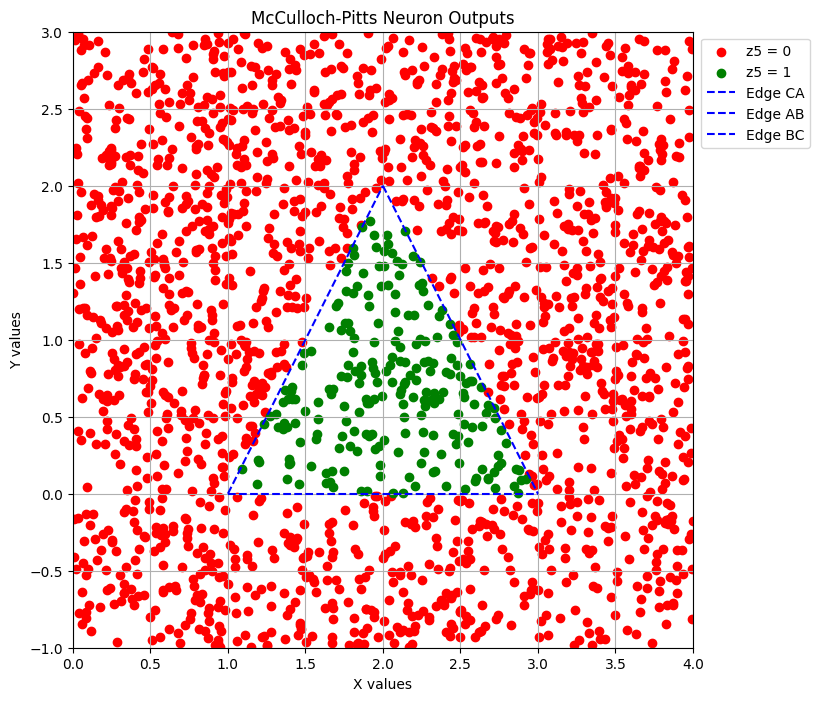

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data points
num_points = 2000
np.random.seed(13)
x_values = np.random.uniform(0, 4, num_points)  # Updated x-axis limits
y_values = np.random.uniform(-1, 3, num_points)  # Updated y-axis limits

# Initialize lists to store data points for different z5 values
red_points = []
green_points = []

# Evaluate data points using the Area function
for i in range(num_points):
    z5_value = Area(x_values[i], y_values[i])
    if z5_value == [0]:  # z5 value is 0
        red_points.append((x_values[i], y_values[i]))
    else:  # z5 value is 1
        green_points.append((x_values[i], y_values[i]))

# Separate x and y values for red and green points
red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

# Plotting
plt.figure(figsize=(8,8))
plt.scatter(red_x, red_y, color='red', label='z5 = 0')
plt.scatter(green_x, green_y, color='green', label='z5 = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')

# Plotting lines with legends
# Add triangle edges for better visualization
plt.plot([1, 2], [0, 2], 'b--', label='Edge CA')
plt.plot([2, 3], [2, 0], 'b--', label='Edge AB')
plt.plot([1, 3], [0, 0], 'b--', label='Edge BC')


plt.grid(True)

# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Save plot as PDF
plt.savefig('c.png', bbox_inches='tight')

plt.show()


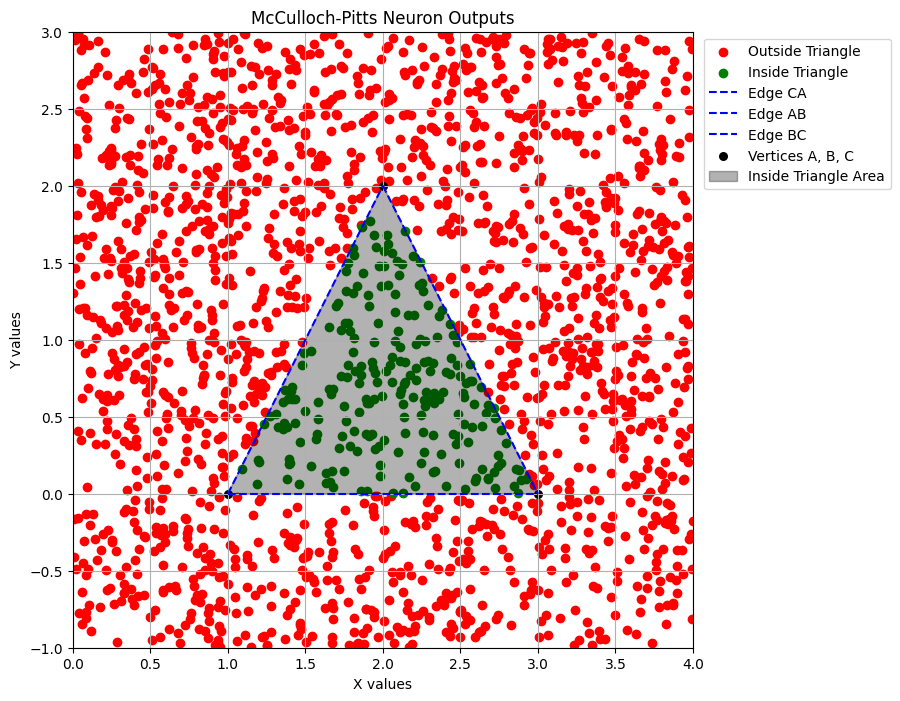

Accuracy of the model: 100.00%


In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define McCulloch-Pitts neuron
class McCullochPittsNeuron:

    def __init__(self, weights, threshold):
        self.weights = weights  # Define weights
        self.threshold = threshold  # Define threshold

    def model(self, inputs):
        # Define model with threshold
        return 1 if self.weights @ inputs >= self.threshold else 0

# Define model for dataset
def check_point_in_triangle(x, y):
    # Define neurons for each line of the triangle
    neurons = [
        McCullochPittsNeuron([-2, -1], -6),  # Line AB
        McCullochPittsNeuron([0, 1], 0),     # Line BC
        McCullochPittsNeuron([2, -1], 2)     # Line CA
    ]

    # Calculate outputs of neurons
    line_outputs = [neuron.model(np.array([x, y])) for neuron in neurons]

    # Combine outputs in a final neuron
    final_neuron = McCullochPittsNeuron([1, 1, 1], 3)  # Logical AND
    final_output = final_neuron.model(np.array(line_outputs))

    return [final_output]

# Generate random data points
num_points = 2000
np.random.seed(13)
x_random = np.random.uniform(0, 4, num_points)  # Updated x-axis limits
y_random = np.random.uniform(-1, 3, num_points)  # Updated y-axis limits

# Initialize lists to store data points for different final outputs
outside_points = []
inside_points = []

# Evaluate data points using the check_point_in_triangle function
for i in range(num_points):
    triangle_check = check_point_in_triangle(x_random[i], y_random[i])
    if triangle_check[0] == 0:  # Outside the triangle
        outside_points.append((x_random[i], y_random[i]))
    else:  # Inside the triangle
        inside_points.append((x_random[i], y_random[i]))

# Separate x and y values for outside and inside points
outside_x, outside_y = zip(*outside_points)
inside_x, inside_y = zip(*inside_points)

# Calculate accuracy
actual_inside_points = len(inside_points)
actual_outside_points = len(outside_points)
total_points = num_points

# Validate classification correctness
correct_inside_classification = sum(
    1 for x, y in inside_points if check_point_in_triangle(x, y)[0] == 1
)
correct_outside_classification = sum(
    1 for x, y in outside_points if check_point_in_triangle(x, y)[0] == 0
)
correct_classifications = correct_inside_classification + correct_outside_classification
accuracy = (correct_classifications / total_points) * 100

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(outside_x, outside_y, color='red', label='Outside Triangle')
plt.scatter(inside_x, inside_y, color='green', label='Inside Triangle')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')

# Add triangle edges for better visualization
plt.plot([1, 2], [0, 2], 'b--', label='Edge CA')
plt.plot([2, 3], [2, 0], 'b--', label='Edge AB')
plt.plot([1, 3], [0, 0], 'b--', label='Edge BC')

# Highlight triangle vertices
plt.scatter([1, 2, 3], [0, 2, 0], color='black', s=30, label='Vertices A, B, C')
plt.text(1, 0, 'A', fontsize=1, color='blue', ha='right')
plt.text(2, 2, 'B', fontsize=1, color='blue', ha='left')
plt.text(3, 0, 'C', fontsize=1, color='blue', ha='left')

# Add filter for the triangle area
triangle_x = [1, 2, 3, 1]
triangle_y = [0, 2, 0, 0]
fill_color = 'black'  # Configurable fill color
plt.fill(triangle_x, triangle_y, color=fill_color, alpha=0.3, label='Inside Triangle Area')

# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Add grid and dynamic legend placement
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.33, 1.0))


# Save plot as PNG
plt.savefig('triangle_output_with_filter.png', bbox_inches='tight')

plt.show()

# Print accuracy
print(f"Accuracy of the model: {accuracy:.2f}%")
